## Solar Consumption Predictions

HERE we increase the datapoints through synthetic generation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

existing_data = pd.DataFrame({
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'solar_consumption': [13.299, 17.683, 30.936, 57.336, 96.123, 121.960, 154.120, 178.734, 248.090],
    'Solar_Power_generated': [2821.91, 1171.62, 3130.36, 5658.63, 9563.69, 6750.97, 6510.06, 5628.80, 12760.50],
    'LCOE': [0.1323, 0.0866, 0.0817, 0.0746, 0.0541, 0.0428, 0.0406, 0.0367, 0.0374],
    'Prices_Avg': [2140, 1458, 1255, 1252, 889, 694, 661, 631, 640]
})

def generate_synthetic_data(existing_data, num_samples=100):
    synthetic_data = {
        'Year': [],
        'solar_consumption': [],
        'Solar_Power_generated': [],
        'LCOE': [],
        'Prices_Avg': []
    }

    for _ in range(num_samples):
        new_year = np.random.randint(existing_data['Year'].min(), existing_data['Year'].max() + 1)
        new_consumption = np.random.uniform(existing_data['solar_consumption'].min(), existing_data['solar_consumption'].max())
        new_power_generated = np.random.uniform(existing_data['Solar_Power_generated'].min(), existing_data['Solar_Power_generated'].max())
        new_lcoe = np.random.uniform(existing_data['LCOE'].min(), existing_data['LCOE'].max())
        new_prices_avg = np.random.uniform(existing_data['Prices_Avg'].min(), existing_data['Prices_Avg'].max())
        synthetic_data['Year'].append(new_year)
        synthetic_data['solar_consumption'].append(new_consumption)
        synthetic_data['Solar_Power_generated'].append(new_power_generated)
        synthetic_data['LCOE'].append(new_lcoe)
        synthetic_data['Prices_Avg'].append(new_prices_avg)

    return pd.DataFrame(synthetic_data)

# Generate 100 new synthetic data points
synthetic_df = generate_synthetic_data(existing_data, num_samples=100)
#combining
combined_df = pd.concat([existing_data, synthetic_df], ignore_index=True)

# Display the updated dataset
print(combined_df)
print(combined_df.columns)



     Year  solar_consumption  Solar_Power_generated      LCOE   Prices_Avg
0    2014          13.299000            2821.910000  0.132300  2140.000000
1    2015          17.683000            1171.620000  0.086600  1458.000000
2    2016          30.936000            3130.360000  0.081700  1255.000000
3    2017          57.336000            5658.630000  0.074600  1252.000000
4    2018          96.123000            9563.690000  0.054100   889.000000
..    ...                ...                    ...       ...          ...
104  2016         215.889296            9574.842102  0.109622   667.097490
105  2015          67.379178           12461.830094  0.130473  1014.299848
106  2020         134.451487           11465.811289  0.130761   835.710425
107  2016         190.108397            4821.198469  0.129283  1182.804514
108  2022          64.716693            8788.717170  0.037485  1262.591142

[109 rows x 5 columns]
Index(['Year', 'solar_consumption', 'Solar_Power_generated', 'LCOE',
       

In [3]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare features and target variable
X = combined_df[['solar_consumption', 'Solar_Power_generated', 'LCOE']]
y = combined_df['Prices_Avg']

model = LinearRegression()

# Apply k-fold cross-validation 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Print the cross-validation results
print("Cross-Validation MSE scores:", -cv_scores)
print("Average MSE:", -np.mean(cv_scores))


Cross-Validation MSE scores: [159986.94361133 161248.61239775 178137.18763596 198320.42615384
 217579.50058406]
Average MSE: 183054.53407658744


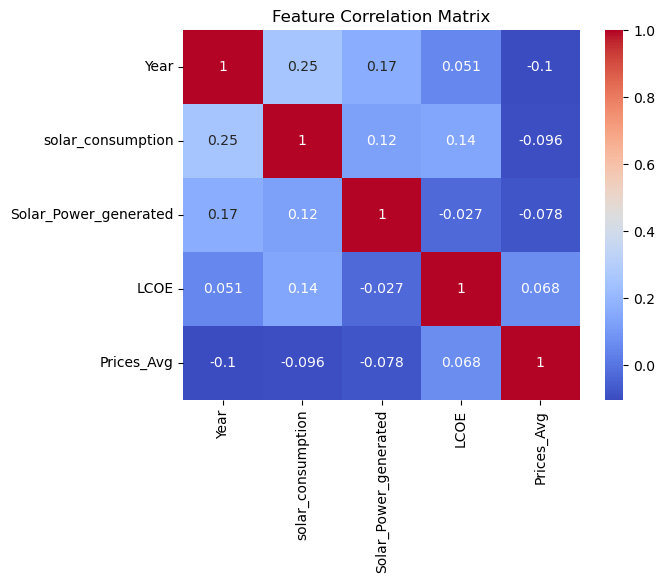

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check correlation matrix
corr_matrix = combined_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_df[['solar_consumption', 'Solar_Power_generated', 'LCOE']])
combined_df['consumption_power_interaction'] = combined_df['solar_consumption'] * combined_df['Solar_Power_generated']


### XGBoost and GradientBoosting

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_cv_scores = cross_val_score(gbm, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

print("Gradient Boosting Average MSE:", -gbm_cv_scores.mean())


Gradient Boosting Average MSE: 234815.7808805487


In [12]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_cv_scores = cross_val_score(xgb, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

print("XGBoost Average MSE:", -xgb_cv_scores.mean())


XGBoost Average MSE: 244699.13519616038


## Gradient Boosting

Best Params for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best MSE for Gradient Boosting after tuning: 195963.71072218334
Test MSE: 221051.26293040894


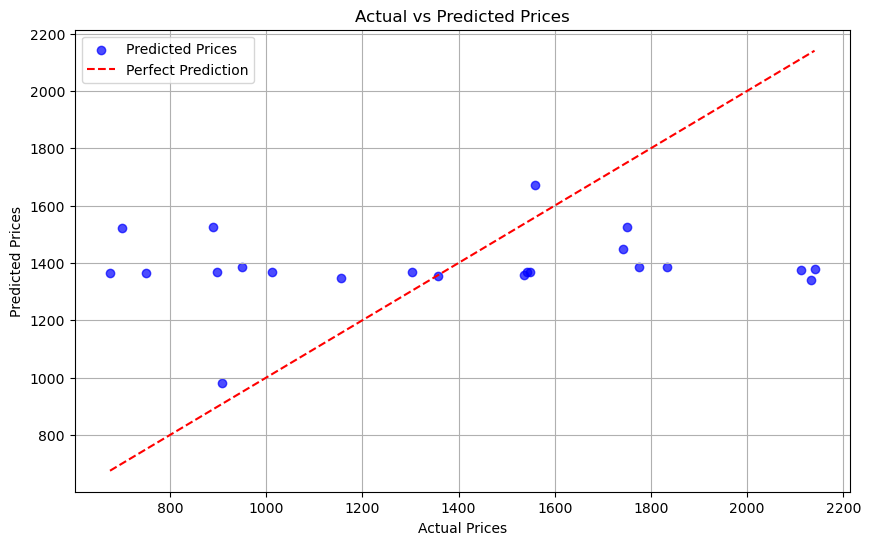

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

existing_data = pd.DataFrame({
    'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'solar_consumption': [13.299, 17.683, 30.936, 57.336, 96.123, 121.960, 154.120, 178.734, 248.090],
    'Solar_Power_generated': [2821.91, 1171.62, 3130.36, 5658.63, 9563.69, 6750.97, 6510.06, 5628.80, 12760.50],
    'LCOE': [0.1323, 0.0866, 0.0817, 0.0746, 0.0541, 0.0428, 0.0406, 0.0367, 0.0374],
    'Prices_Avg': [2140, 1458, 1255, 1252, 889, 694, 661, 631, 640]
})

def generate_synthetic_data(existing_data, num_samples=100):
    synthetic_data = {
        'solar_consumption': [],
        'Solar_Power_generated': [],
        'LCOE': [],
        'Prices_Avg': []
    }

    for _ in range(num_samples):
        new_consumption = np.random.uniform(existing_data['solar_consumption'].min(), existing_data['solar_consumption'].max())
        new_power_generated = np.random.uniform(existing_data['Solar_Power_generated'].min(), existing_data['Solar_Power_generated'].max())
        new_lcoe = np.random.uniform(existing_data['LCOE'].min(), existing_data['LCOE'].max())
        new_prices_avg = np.random.uniform(existing_data['Prices_Avg'].min(), existing_data['Prices_Avg'].max())

        synthetic_data['solar_consumption'].append(new_consumption)
        synthetic_data['Solar_Power_generated'].append(new_power_generated)
        synthetic_data['LCOE'].append(new_lcoe)
        synthetic_data['Prices_Avg'].append(new_prices_avg)

    return pd.DataFrame(synthetic_data)

# Combine existing and synthetic data
synthetic_df = generate_synthetic_data(existing_data, num_samples=100)
combined_df = pd.concat([existing_data, synthetic_df], ignore_index=True)


X = combined_df[['solar_consumption', 'Solar_Power_generated', 'LCOE']]
y = combined_df['Prices_Avg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning with Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_mse = -grid_search.best_score_
print("Best Params for Gradient Boosting:", best_params)
print("Best MSE for Gradient Boosting after tuning:", best_mse)

best_gb_model = GradientBoostingRegressor(**best_params, random_state=42)
best_gb_model.fit(X_train_scaled, y_train)

y_pred = best_gb_model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

# Plotting Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Prices', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()




## XGBoost

Best Params for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best MSE for XGBoost after tuning: 145727.56038650087
Test MSE: 51813.21674133837


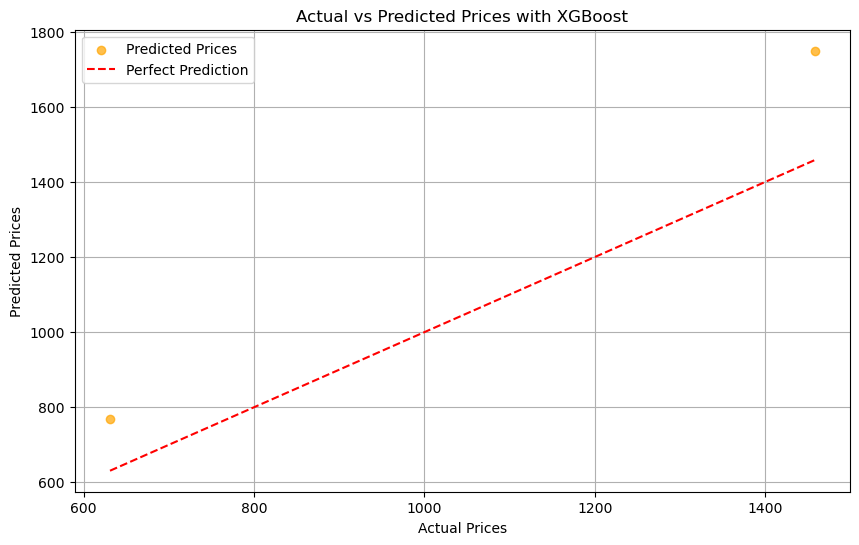

In [25]:
X = combined_df[['solar_consumption', 'Solar_Power_generated', 'LCOE']]
y = combined_df['Prices_Avg']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning with XGBoost
xgb_model = XGBRegressor(random_state=42)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]  # To prevent overfitting
}
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and MSE
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_
print("Best Params for XGBoost:", best_params)
print("Best MSE for XGBoost after tuning:", best_mse)

# Train the final model with the best parameters
best_xgb_model = XGBRegressor(**best_params, random_state=42)
best_xgb_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = best_xgb_model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='orange', label='Predicted Prices', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Prices with XGBoost')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()

### THhis is for predicting usage using linear regression

Rows with missing or invalid Year values:
     Year  solar_consumption  Solar_Power_generated      LCOE   Prices_Avg
9     NaN         126.531768            1582.287299  0.075773   639.482436
10    NaN         149.049417            6748.857355  0.088715  1549.186159
11    NaN         182.450166            6936.076746  0.051577   699.759282
12    NaN          46.982423            5551.553168  0.097109   898.431525
13    NaN         143.718257            7620.605965  0.072544  1184.893317
..    ...                ...                    ...       ...          ...
104   NaN          79.562760           12600.381817  0.103564  1269.033911
105   NaN          76.111292           10433.510828  0.074442  1618.108350
106   NaN         149.342634            8443.125371  0.102785  1861.847252
107   NaN          67.574349            5976.800447  0.058911  2132.383925
108   NaN         239.792798           11115.019365  0.124087  1956.266705

[100 rows x 5 columns]
Rows with missing Year values afte

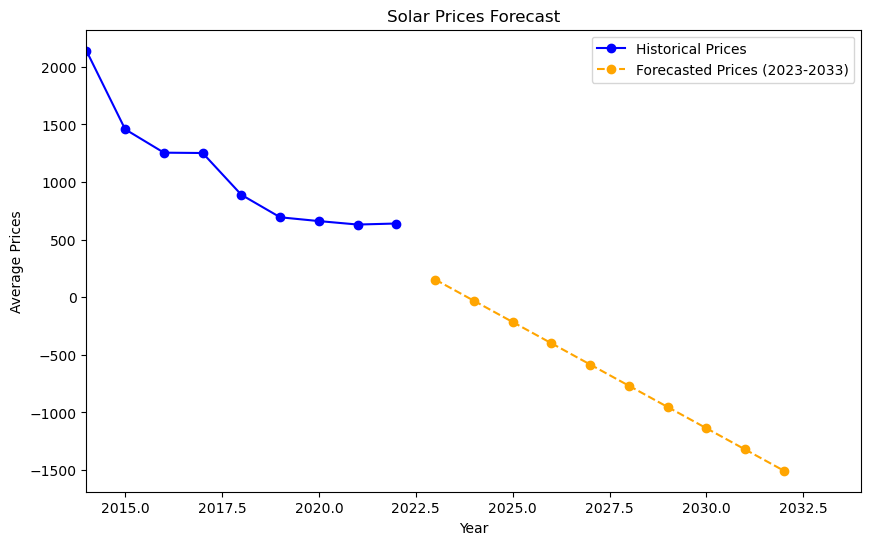

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


missing_years = combined_df[combined_df['Year'].isna()]
print("Rows with missing or invalid Year values:")
print(missing_years)
combined_df = combined_df.dropna(subset=['Year'])

combined_df['Year'] = pd.to_numeric(combined_df['Year'], errors='coerce')##check for missing values

missing_years_after = combined_df[combined_df['Year'].isna()]
print("Rows with missing Year values after cleaning:")
print(missing_years_after)

combined_df.reset_index(drop=True, inplace=True)
X = combined_df[['Year']] 
y = combined_df['Prices_Avg']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"\nLinear Regression Training Metrics:")
print(f"R²: {r2_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"MAE: {mae_train:.4f}")

print(f"\nLinear Regression Testing Metrics:")
print(f"R²: {r2_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"MAE: {mae_test:.4f}")

# Forecast for the next 10 years (2025-2034)
future_years = pd.DataFrame({'Year': np.arange(2023, 2033)})
future_predictions = model.predict(future_years)

# Create a DataFrame for the future predictions
future_df = pd.DataFrame(future_predictions, index=future_years['Year'], columns=['Forecasted Prices'])

# Step 4: Plotting the historical and forecasted prices
plt.figure(figsize=(10, 6))
plt.plot(combined_df['Year'], combined_df['Prices_Avg'], label='Historical Prices', color='blue', marker='o')
plt.plot(future_df.index, future_df['Forecasted Prices'], label='Forecasted Prices (2023-2033)', color='orange', linestyle='--', marker='o')

# Set x-axis limits from 2014 to 2034
plt.xlim([2014, 2034])
plt.xlabel('Year')
plt.ylabel('Average Prices')
plt.title('Solar Prices Forecast')
plt.legend()
plt.show()



XGBoost Training Metrics:
R²: 0.6510
MSE: 1963.9307
MAE: 33.5979

XGBoost Testing Metrics:
R²: 0.6481
MSE: 2281.7702
MAE: 47.7649


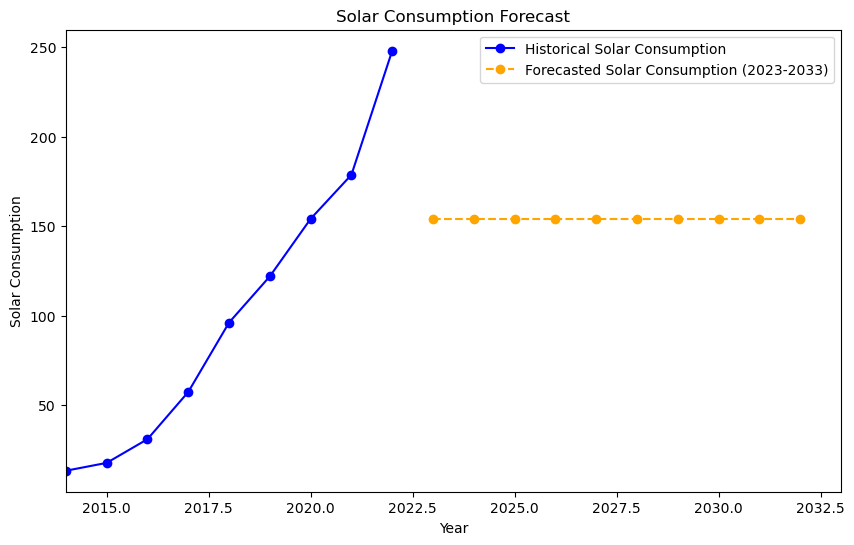

In [20]:

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

X = combined_df[['Year']]
y = combined_df['solar_consumption']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xg_model = XGBRegressor(learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8)
xg_model.fit(X_train, y_train)

# Predictions
y_pred_train = xg_model.predict(X_train)
y_pred_test = xg_model.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"\nXGBoost Training Metrics:")
print(f"R²: {r2_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"MAE: {mae_train:.4f}")

print(f"\nXGBoost Testing Metrics:")
print(f"R²: {r2_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"MAE: {mae_test:.4f}")

# Forecasting future solar consumption
future_years = pd.DataFrame({'Year': np.arange(2023, 2033)})
future_predictions = xg_model.predict(future_years)
#Dataframe
future_df_xg = pd.DataFrame(future_predictions, index=future_years['Year'], columns=['Forecasted Solar Consumption'])

plt.figure(figsize=(10, 6))
plt.plot(combined_df['Year'], combined_df['solar_consumption'], label='Historical Solar Consumption', color='blue', marker='o')
plt.plot(future_df_xg.index, future_df_xg['Forecasted Solar Consumption'], label='Forecasted Solar Consumption (2023-2033)', color='orange', linestyle='--', marker='o')

plt.xlim([2014, 2033])
plt.xlabel('Year')
plt.ylabel('Solar Consumption')
plt.title('Solar Consumption Forecast')
plt.legend()
plt.show()
